In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score,KFold
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

In [2]:
# creating dataframe as df and reading it 
df=pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/Shopping_Revenue.csv')
df.set_index('Id',inplace=True)

# Getting top 5 value of data frame 
df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2.0,...,3.0,5,3,4,5,5,4,3,4,5653753
1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2.0,...,3.0,0,0,0,0,0,0,0,0,6923131
2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3.0,...,3.0,0,0,0,0,0,0,0,0,2055379
3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4.0,...,7.5,25,12,10,6,18,12,12,6,2675511
4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2.0,...,3.0,5,1,3,2,3,4,3,3,4316715


In [3]:
#Getting idea about the data we have like column name ,  what is the data types , how many null and not null present

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open Date   137 non-null    object 
 1   City        137 non-null    object 
 2   City Group  137 non-null    object 
 3   Type        137 non-null    object 
 4   P1          137 non-null    int64  
 5   P2          137 non-null    float64
 6   P3          137 non-null    float64
 7   P4          137 non-null    float64
 8   P5          137 non-null    int64  
 9   P6          133 non-null    float64
 10  P7          133 non-null    float64
 11  P8          137 non-null    int64  
 12  P9          137 non-null    int64  
 13  P10         137 non-null    int64  
 14  P11         137 non-null    int64  
 15  P12         137 non-null    int64  
 16  P13         137 non-null    float64
 17  P14         137 non-null    int64  
 18  P15         137 non-null    int64  
 19  P16         137 non-null    i

In [4]:
df['Age in years']=2022 - df['Open Date'].str.split('/',expand=True)[2].apply(int)
#Dropping column open data
df.drop('Open Date',axis=1,inplace=True)

# viewing the data again 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          137 non-null    object 
 1   City Group    137 non-null    object 
 2   Type          137 non-null    object 
 3   P1            137 non-null    int64  
 4   P2            137 non-null    float64
 5   P3            137 non-null    float64
 6   P4            137 non-null    float64
 7   P5            137 non-null    int64  
 8   P6            133 non-null    float64
 9   P7            133 non-null    float64
 10  P8            137 non-null    int64  
 11  P9            137 non-null    int64  
 12  P10           137 non-null    int64  
 13  P11           137 non-null    int64  
 14  P12           137 non-null    int64  
 15  P13           137 non-null    float64
 16  P14           137 non-null    int64  
 17  P15           137 non-null    int64  
 18  P16           137 non-null    

In [5]:
#to get mean of null values
df.isna().mean()

# instead of removing rows with missing values we remove the two columns 

df.drop(['P6','P7'],axis=1,inplace=True)

In [8]:
# Getting values like mean median std and min and max value
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P1,137.0,4.014599e+00,2.910391e+00,1.0,2.0,3.0,4.0,12.0
P2,137.0,4.408759e+00,1.514900e+00,1.0,4.0,5.0,5.0,7.5
P3,137.0,4.317518e+00,1.032337e+00,0.0,4.0,4.0,5.0,7.5
P4,137.0,4.372263e+00,1.016462e+00,3.0,4.0,4.0,5.0,7.5
P5,137.0,2.007299e+00,1.209620e+00,1.0,1.0,2.0,2.0,8.0
P8,137.0,5.153285e+00,1.858567e+00,1.0,4.0,5.0,5.0,10.0
P9,137.0,5.445255e+00,1.834793e+00,4.0,4.0,5.0,5.0,10.0
P10,137.0,5.489051e+00,1.847561e+00,4.0,5.0,5.0,5.0,10.0
P11,137.0,3.262774e+00,1.910767e+00,1.0,2.0,3.0,4.0,10.0
P12,137.0,5.299270e+00,1.941668e+00,2.0,4.0,5.0,5.0,10.0


<AxesSubplot:>

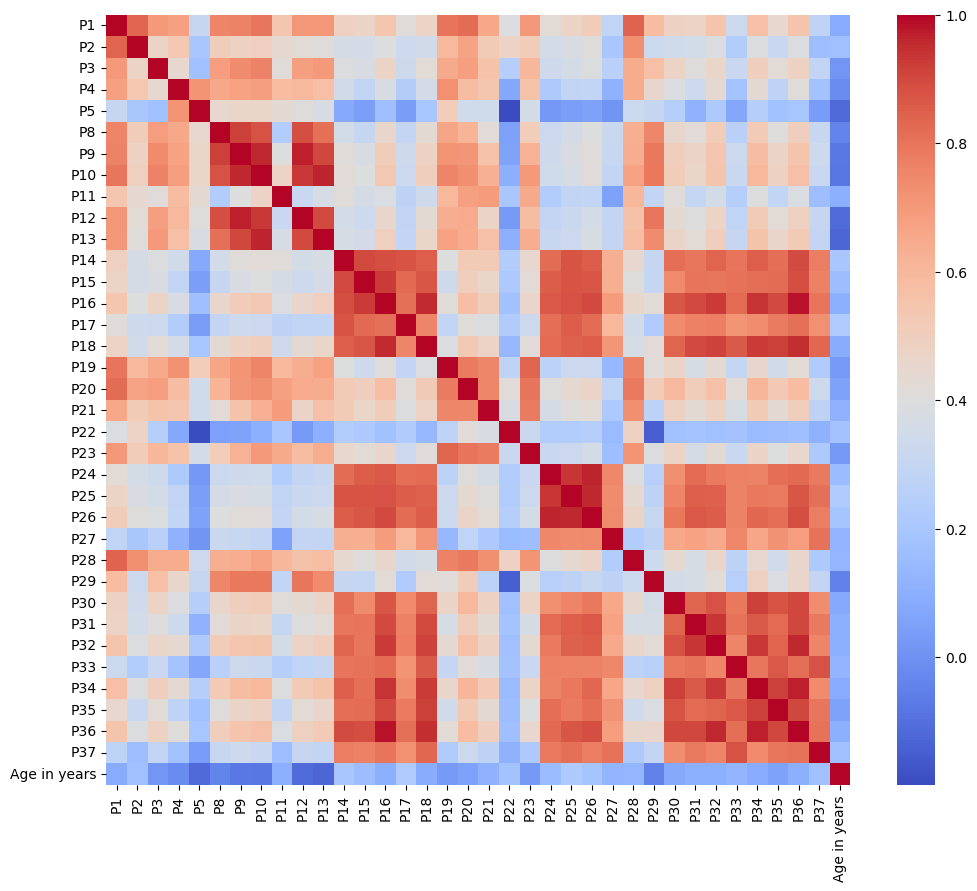

In [10]:
#correlation analysis
plt.figure(figsize = (12,10)) 
sns.heatmap(df.drop('revenue',axis=1).corr(),cmap='coolwarm')

In [11]:
#Categorical data 
print('No of distinct cities: {}' .format(df['City'].nunique()))
print('No of distinct city groups: {}' .format(df['City Group'].nunique()))
print('No of distinct types : {}' .format(df['Type'].nunique()))

No of distinct cities: 34
No of distinct city groups: 2
No of distinct types : 3


In [12]:
# dropping city column 

df.drop(['City'],axis=1,inplace=True)

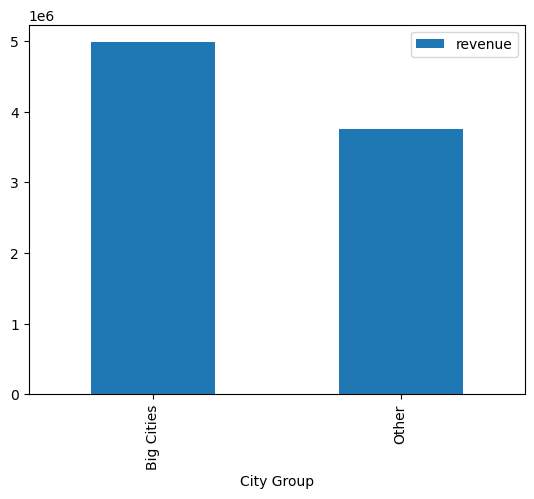

In [16]:
# getting idea about revenue 

df.groupby(['City Group']).agg({'revenue':'mean'}).plot(kind='bar').color = "red"

<AxesSubplot:xlabel='Type'>

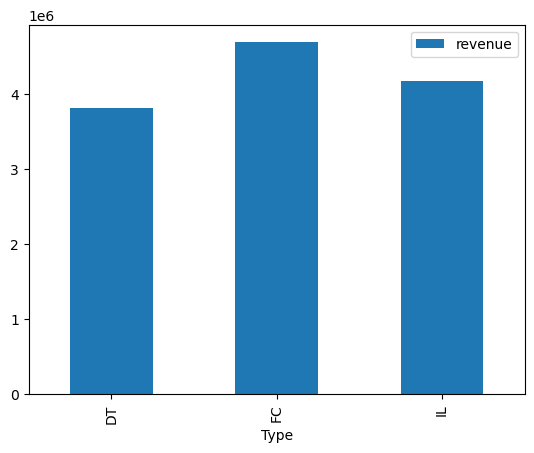

In [17]:
#Higher revenue is observed type 'FC' followed by 'IL' and then 'DT'. 

df.groupby('Type').agg({'revenue':'mean'}).plot(kind='bar')

<AxesSubplot:xlabel='City Group,Type'>

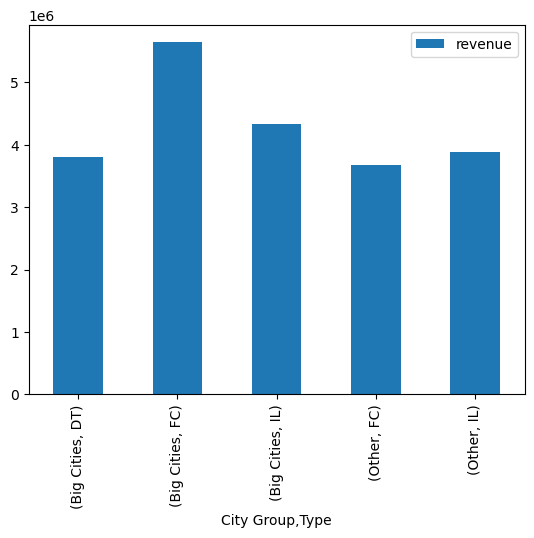

In [18]:
df.groupby(['City Group','Type']).agg({'revenue':'mean'}).plot(kind='bar')

In [19]:
type = pd.get_dummies(df['Type'],drop_first=True)
type

,FC,IL
Id,,
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
132,1,0
133,1,0
134,1,0


In [20]:
city=pd.get_dummies(df['City Group'])['Big Cities']
city

Id
0      1
1      1
2      0
3      0
4      0
      ..
132    0
133    1
134    0
135    1
136    1
Name: Big Cities, Length: 137, dtype: uint8

In [21]:
df=pd.concat([df,city,type],axis=1)
df.drop(['Type','City Group'],axis=1,inplace=True)

In [22]:
# Viewing the first 5 data point in dataframe
df.head()

,P1,P2,P3,P4,P5,P8,P9,P10,P11,P12,...,P33,P34,P35,P36,P37,revenue,Age in years,Big Cities,FC,IL
Id,,,,,,,,,,,,,,,,,,,,,
0,4,5.0,4.0,4.0,2,4,5,5,3,5,...,5,5,4,3,4,5653753,23,1,0,1
1,4,5.0,4.0,4.0,1,5,5,5,1,5,...,0,0,0,0,0,6923131,14,1,1,0
2,2,4.0,2.0,5.0,2,5,5,5,2,5,...,0,0,0,0,0,2055379,9,0,0,1
3,6,4.5,6.0,6.0,4,8,10,10,8,10,...,6,18,12,12,6,2675511,10,0,0,1
4,3,4.0,3.0,4.0,2,5,5,5,2,5,...,2,3,4,3,3,4316715,13,0,0,1


In [24]:
target='revenue'
features=df.drop(target,axis=1).columns
X=df[features]
y=df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print('feature training dataset shape='+str(X_train.shape))
print('feature test dataset shape='+str(X_test.shape))
print('output training dataset shape='+str(y_train.shape))
print('output test dataset shape='+str(y_test.shape))

feature training dataset shape=(109, 39)
feature test dataset shape=(28, 39)
output training dataset shape=(109,)
output test dataset shape=(28,)


In [25]:
#Baseline
y_baseline=y_train.mean()
print('Baseline score = {}'.format(mean_absolute_error(y_train,([y_baseline]*len(y_train)))))

Baseline score = 1566761.9533709285


# Model 1 - Linear Regression

In [26]:
#Model 1 - Linear Regression
m1=LinearRegression()

scores=[]
for i in range(1,40):
    rfe = RFE(m1, n_features_to_select=i)             
    rfe.fit(X_train, y_train)
    cols=X_train.columns[rfe.support_]
    X_train_temp=X_train[cols]
    X_test_temp=X_test[cols]
    m1.fit(X_train_temp,y_train)
    scores.append((i,mean_absolute_error(m1.predict(X_train_temp),y_train),mean_absolute_error(m1.predict(X_test_temp),y_test)))
scores.sort(key=lambda x: x[1])
scores

[(25, 1154609.8147644396, 2903153.029489543),
 (27, 1155534.9144407045, 2893675.6467581084),
 (26, 1155669.3875204267, 2893517.95339635),
 (28, 1156252.8691396653, 2887707.1967395446),
 (29, 1156939.0414165661, 2895282.0248783603),
 (24, 1156946.9855527985, 2888616.023268052),
 (36, 1158813.4773167626, 2931822.7487903447),
 (38, 1158989.732143982, 2953278.855171843),
 (39, 1159027.761092665, 2953257.89727657),
 (35, 1159213.2665033957, 2925249.1351496913),
 (37, 1159441.1478985476, 2944165.52758198),
 (22, 1160700.3387115202, 2821232.3129434693),
 (21, 1161064.3990561909, 2790902.563016007),
 (18, 1162562.6369550987, 2818740.639231317),
 (23, 1162667.3100792025, 2865953.2876249715),
 (33, 1165399.684730695, 2803604.5861776024),
 (34, 1165677.5563295842, 2863139.585037233),
 (30, 1166667.3877335591, 2813899.2865966153),
 (32, 1167989.9845112083, 2819855.711495951),
 (19, 1171466.9443963675, 2820938.1422271878),
 (17, 1173066.0804640178, 2802118.6442211783),
 (31, 1173336.1406441764, 283

In [27]:
rfe = RFE(m1, n_features_to_select=25)             
rfe.fit(X_train, y_train)
cols=X_train.columns[rfe.support_]
X_train_temp=X_train[cols]
X_test_temp=X_test[cols]
m1.fit(X_train_temp,y_train)

LinearRegression()

In [28]:
mean_absolute_error(m1.predict(X_test_temp),y_test)

# As we can see above, our maximum train score is 0.5077 which is really bad. So, we move on to other methods.

2903153.029489543

# model 2 - SVR

In [29]:
# model 2 - SVR
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print('feature training dataset shape='+str(X_train.shape))
print('feature test dataset shape='+str(X_test.shape))
print('output training dataset shape='+str(y_train.shape))
print('output test dataset shape='+str(y_test.shape))

feature training dataset shape=(109, 39)
feature test dataset shape=(28, 39)
output training dataset shape=(109,)
output test dataset shape=(28,)


In [30]:
m2=Ridge()
scores=[]
for i in range(1,40):
    rfe = RFE(m2, n_features_to_select=i)             
    rfe.fit(X_train, y_train)
    cols=X_train.columns[rfe.support_]
    X_train_temp=X_train[cols]
    X_test_temp=X_test[cols]
    m2.fit(X_train_temp,y_train)
    scores.append((i,mean_absolute_error(m2.predict(X_train_temp),y_train),mean_absolute_error(m2.predict(X_test_temp),y_test)))
scores.sort(key=lambda x: x[1])
scores

[(26, 1147701.3543269092, 2795338.4563052515),
 (28, 1147880.1316093148, 2795966.9942848315),
 (29, 1147962.9229709583, 2795834.675766428),
 (25, 1147970.5507803657, 2804903.0373253487),
 (27, 1148193.389820709, 2799568.0533120655),
 (18, 1152916.91004878, 2732572.392476713),
 (22, 1153778.0453696907, 2748058.3554873997),
 (23, 1156446.3118121591, 2788315.039114048),
 (21, 1157323.553393231, 2718959.814667585),
 (24, 1157893.3206157845, 2785813.305788517),
 (37, 1162022.4375703896, 2857112.1988943773),
 (39, 1162117.4631177464, 2864715.114175134),
 (38, 1162138.1175625988, 2864495.813152539),
 (19, 1163280.4632621196, 2748197.755863773),
 (36, 1164192.6714438116, 2842536.8381261122),
 (17, 1164663.3504264422, 2735038.432903892),
 (35, 1164981.6760928982, 2841045.6617796766),
 (16, 1165041.8226377198, 2672384.2567289877),
 (20, 1165984.8557214371, 2746480.802599147),
 (34, 1176986.8574970476, 2776385.3671537517),
 (33, 1177044.476029565, 2776400.1661985335),
 (32, 1179190.8303778106, 27

In [31]:
rfe = RFE(Ridge(), n_features_to_select=26)             
rfe.fit(X_train, y_train)
cols=X_train.columns[rfe.support_]
X_train_temp=X_train[cols]
X_test_temp=X_test[cols]
m2.fit(X_train_temp,y_train)

Ridge()

In [32]:
mean_absolute_error(m2.predict(X_test_temp),y_test)

# The o/p is very bad so moving to another algorithm 

2795338.4563052515

# model 3 - Decision tree

In [33]:
#model 3 - Decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print('feature training dataset shape='+str(X_train.shape))
print('feature test dataset shape='+str(X_test.shape))
print('output training dataset shape='+str(y_train.shape))
print('output test dataset shape='+str(y_test.shape))

feature training dataset shape=(109, 39)
feature test dataset shape=(28, 39)
output training dataset shape=(109,)
output test dataset shape=(28,)


In [34]:
m4=DecisionTreeRegressor(random_state=42)
m4
params = {'max_depth': range(1, 25)}
params

{'max_depth': range(1, 25)}

In [35]:
tree = GridSearchCV(m4, params, 
                    cv=5, 
                   verbose=True)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(1, 25)}, verbose=True)

In [37]:
mean_absolute_error(tree.predict(X_train),y_train)

1235712.5722921556

In [36]:
mean_absolute_error(tree.predict(X_test),y_test)

1921042.6986434106

# KNN regressor

In [38]:
#m4 KNN regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print('feature training dataset shape='+str(X_train.shape))
print('feature test dataset shape='+str(X_test.shape))
print('output training dataset shape='+str(y_train.shape))
print('output test dataset shape='+str(y_test.shape))

feature training dataset shape=(109, 39)
feature test dataset shape=(28, 39)
output training dataset shape=(109,)
output test dataset shape=(28,)


In [39]:
m5=KNeighborsRegressor()
m5

KNeighborsRegressor()

In [40]:
params={'n_neighbors':range(10,21)}

In [41]:
NN = GridSearchCV(m5, params, 
                    cv=5, 
                   verbose=True)
NN.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(10, 21)}, verbose=True)

In [43]:
mean_absolute_error(NN.predict(X_train),y_train)



1356847.7798165134

In [44]:
mean_absolute_error(NN.predict(X_test),y_test)

2090230.5678571428

# m6 Random Forest

In [46]:
#m6 Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print('feature training dataset shape='+str(X_train.shape))
print('feature test dataset shape='+str(X_test.shape))
print('output training dataset shape='+str(y_train.shape))
print('output test dataset shape='+str(y_test.shape))

feature training dataset shape=(109, 39)
feature test dataset shape=(28, 39)
output training dataset shape=(109,)
output test dataset shape=(28,)


In [47]:
m6=RandomForestRegressor()
m6
params={'n_estimators':range(10,100,10),'max_depth':range(10,21)}

In [48]:
rf= GridSearchCV(m6, params, 
                    cv=5, 
                   verbose=True)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(10, 21),
                         'n_estimators': range(10, 100, 10)},
             verbose=True)

In [49]:
mean_absolute_error(rf.predict(X_train),y_train)

660311.2329838357

In [50]:
mean_absolute_error(rf.predict(X_test),y_test)

1830957.3918367347

# model 7- Gradient Descent Regresso

In [52]:
#model 7- Gradient Descent Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print('feature training dataset shape='+str(X_train.shape))
print('feature test dataset shape='+str(X_test.shape))
print('output training dataset shape='+str(y_train.shape))
print('output test dataset shape='+str(y_test.shape))

feature training dataset shape=(109, 39)
feature test dataset shape=(28, 39)
output training dataset shape=(109,)
output test dataset shape=(28,)


In [53]:
m7=GradientBoostingRegressor()
m7

params={'n_estimators':range(10,100,10),'max_depth':range(10,21),'learning_rate': [0.01,0.05,0.1,0.2,0.3,0.4,0.5]}

In [54]:
gb= GridSearchCV(m7, params, 
                    cv=5, 
                   verbose=True)
gb.fit(X_train, y_train)


Fitting 5 folds for each of 693 candidates, totalling 3465 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': range(10, 21),
                         'n_estimators': range(10, 100, 10)},
             verbose=True)

In [55]:
mean_absolute_error(gb.predict(X_train),y_train)

1281465.4712254717

In [56]:

mean_absolute_error(gb.predict(X_test),y_test)

1883971.7675089755

In [ ]:
BEST MODEL IS RANDOM FOREST . SO WE WILL GO WITH IT 


In [57]:
gb.best_estimator_
best_model=GradientBoostingRegressor(learning_rate=0.01, max_depth=20, n_estimators=20)
best_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=20, n_estimators=20)

In [58]:
feat_imp=best_model.feature_importances_
features=X_train.columns
importances=pd.Series(feat_imp,index=features).sort_values()

<AxesSubplot:>

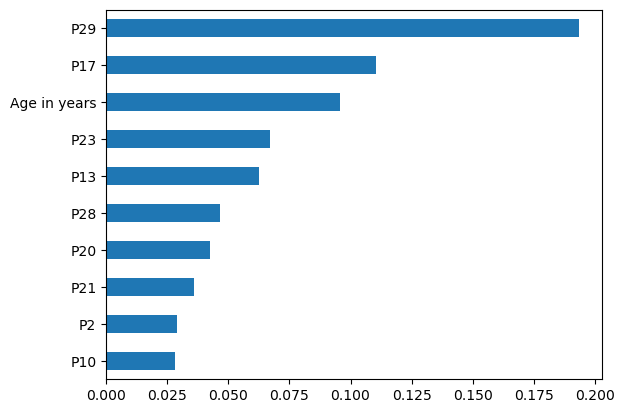

In [59]:
#10 best features
importances.tail(10).plot(kind='barh')